# Image processing

In [2]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import misc
from sklearn.cluster import KMeans
import seaborn as sns
from numpy import linalg as la
from math import floor
import scipy.stats as st
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
def roundup(number):
    return round(number+.5)

In [26]:
#show whats on the current directory
os.listdir()

['new_img.jpg',
 'imageWithPalette.jpg',
 'OsciladorArmónico.ipynb',
 'text_processing.ipynb',
 '.DS_Store',
 'computing.ipynb',
 'weirdReshapes.jpeg',
 'IMG_0575.JPG',
 'panoramica2.jpg',
 'panoramica1.jpg',
 'panoramica0.jpg',
 'basic_but_not_standard.ipynb',
 'nuevaPies.jpg',
 'README.md',
 '.gitignore',
 'imageReconWithPalette.jpg',
 '.ipynb_checkpoints',
 '.git',
 'imageProcessing.ipynb',
 'IMG_0569.jpg']

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


ysize: 3670 and xsize 2752


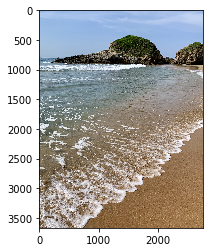

In [21]:
img=misc.imread('IMG_6846.JPG')
# get some important details, sizex, sisey.
ysize=img.shape[0]
xsize=img.shape[1]
print(f'ysize: {ysize} and xsize {xsize}')
plt.imshow(img)

In [5]:
img.shape

(3456, 4608, 3)

In [213]:
#save image
misc.imsave('cuadros.png', a)

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


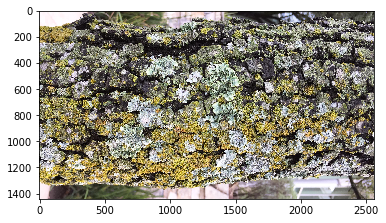

In [6]:
#rotate image and save
rotated = ndimage.rotate(img, -90)
misc.imsave('vuelta.png', rotated)
plt.imshow(rotated, cmap=plt.cm.gray)      

15925248

# weird reshapes

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


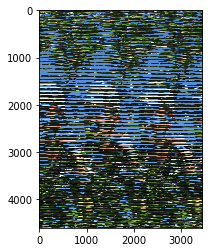

In [12]:

new_img=np.reshape(img,(xsize,ysize,3))
plt.imshow(new_img, cmap=plt.cm.gray)
misc.imsave('weirdReshapes.jpeg',new_img)



# Slice experiments, try todo the horizontal ones.

In [131]:
def slice_image_r_m(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=ysize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    maping=np.random.permutation(slices)
    for i in range(slices):
        idy1=int(i*scale)
        idy2=int((maping[i])*scale)


        slicer1=(slice(idy1, idy1+int(scale), 1), slice(0, xsize, 1),slice(0, 3, 1))

        slicer2=(slice(idy2, idy2+int(scale), 1), slice(0, xsize, 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  



In [211]:
img.shape[0]


3456

In [143]:
def slice_image_r_n(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=xsize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    maping=np.random.permutation(slices)
    for i in range(slices):
        idx1=int(i*scale)
        idx2=int((maping[i])*scale)


        slicer1=(slice(0, ysize, 1), slice(idx1,idx1+int(scale), 1),slice(0, 3, 1))

        slicer2=(slice(0, ysize, 1), slice(idx2, idx2+int(scale), 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  


    return new_img


In [134]:
def slice_image_m(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=ysize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    new_img=img
    mapping=[]
    for i in range(slices):
        if i%2==0:
            mapping.append(i+1)
        else:
            mapping.append(i-1)
    print(mapping)
    for i in range(slices):
        idy1=int(i*scale)
        idy2=int((mapping[i])*scale)


        slicer1=(slice(idy1, idy1+int(scale), 1), slice(0, xsize, 1),slice(0, 3, 1))

        slicer2=(slice(idy2, idy2+int(scale), 1), slice(0, xsize, 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  
    return new_img



In [132]:
def slice_image_n(img,slices):
    scale=xsize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    
    mapping=[]
    for i in range(slices):
        if i%2==0:
            mapping.append(i+1)
        else:
            mapping.append(i-1)
    print(mapping)
    for i in range(slices):
        idx1=int(i*scale)
        idx2=int((mapping[i])*scale)


        slicer1=(slice(0, ysize, 1), slice(idx1,idx1+int(scale), 1),slice(0, 3, 1))

        slicer2=(slice(0, ysize, 1), slice(idx2, idx2+int(scale), 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  


    return new_img

[1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26, 29, 28, 31, 30, 33, 32, 35, 34, 37, 36, 39, 38, 41, 40, 43, 42, 45, 44, 47, 46, 49, 48, 51, 50, 53, 52, 55, 54, 57, 56, 59, 58, 61, 60, 63, 62, 65, 64, 67, 66, 69, 68, 71, 70, 73, 72, 75, 74, 77, 76, 79, 78, 81, 80, 83, 82, 85, 84, 87, 86, 89, 88, 91, 90, 93, 92, 95, 94, 97, 96, 99, 98, 101, 100, 103, 102, 105, 104, 107, 106, 109, 108, 111, 110, 113, 112, 115, 114, 117, 116, 119, 118, 121, 120, 123, 122, 125, 124, 127, 126, 129, 128, 131, 130, 133, 132, 135, 134, 137, 136, 139, 138, 141, 140, 143, 142, 145, 144, 147, 146, 149, 148, 151, 150, 153, 152, 155, 154, 157, 156, 159, 158, 161, 160, 163, 162, 165, 164, 167, 166, 169, 168, 171, 170, 173, 172, 175, 174, 177, 176, 179, 178, 181, 180, 183, 182, 185, 184, 187, 186, 189, 188, 191, 190, 193, 192, 195, 194, 197, 196, 199, 198, 201, 200, 203, 202, 205, 204, 207, 206, 209, 208, 211, 210, 213, 212, 215, 214, 217, 216, 219, 218, 221, 220,

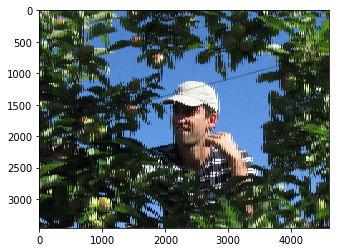

In [232]:
a=slice_image_n(img,int(4608/20))

[1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26, 29, 28, 31, 30, 33, 32, 35, 34, 37, 36, 39, 38, 41, 40, 43, 42, 45, 44, 47, 46, 49, 48, 51, 50, 53, 52, 55, 54, 57, 56, 59, 58, 61, 60, 63, 62, 65, 64, 67, 66, 69, 68, 71, 70, 73, 72, 75, 74, 77, 76, 79, 78, 81, 80, 83, 82, 85, 84, 87, 86, 89, 88, 91, 90, 93, 92, 95, 94, 97, 96, 99, 98, 101, 100, 103, 102, 105, 104, 107, 106, 109, 108, 111, 110, 113, 112, 115, 114, 117, 116, 119, 118, 121, 120, 123, 122, 125, 124, 127, 126, 129, 128, 131, 130, 133, 132, 135, 134, 137, 136, 139, 138, 141, 140, 143, 142, 145, 144, 147, 146, 149, 148, 151, 150, 153, 152, 155, 154, 157, 156, 159, 158, 161, 160, 163, 162, 165, 164, 167, 166, 169, 168, 171, 170]


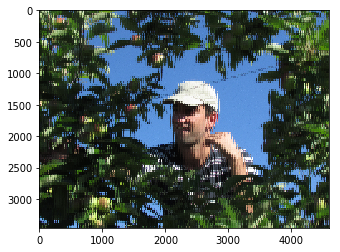

In [233]:
a=slice_image_m(a,int(3456/20))

# Nueva funcion que cada slice la mueve derecha izquierda

# K means n color palette

(3670, 2752, 3)
<class 'numpy.ndarray'>


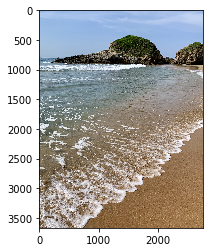

In [20]:
#def color_palette(img,n=4):

n=15
print(img.shape)

print(type(img))
new_img=np.reshape(img,(xsize*ysize,3))
model=KMeans(n_clusters=n,random_state=42).fit(new_img)#verbose=1
#sns.palplot(colors)
plt.imshow(img, cmap=plt.cm.gray) 
#return model

## colores

(10099840, 3)
[[0.49411765 0.43529412 0.35294118]
 [0.61568627 0.72941176 0.89019608]
 [0.04313725 0.03921569 0.00392157]
 [0.64313725 0.58431373 0.54117647]
 [0.74901961 0.70588235 0.6745098 ]
 [0.61960784 0.47843137 0.3372549 ]
 [0.91764706 0.92156863 0.9372549 ]
 [0.40392157 0.33333333 0.24705882]
 [0.22352941 0.21176471 0.11764706]
 [0.47843137 0.5372549  0.54901961]
 [0.56862745 0.50980392 0.43921569]
 [0.54117647 0.4        0.25098039]
 [0.58039216 0.61960784 0.64313725]
 [0.82745098 0.81568627 0.81176471]
 [0.39215686 0.45098039 0.45098039]]


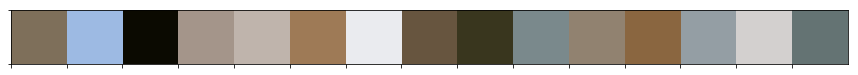

In [22]:
colors=[]
print(new_img.shape)
for i in range(n):
    colors.append((np.median(new_img[model.labels_==i],axis=0)))
    colors[i]=colors[i]/255
    #new_img[model.labels_==i]=colors[i]
colors=np.array(colors)
#It could be scaled automatically by an optimizer.
#for i in range(n):
    #colors[i]=colors[i]/max(colors[i])
sns.palplot(colors)
print(colors)

# nueva imagen

In [23]:
# clusters from image.
def nueva_imagen():
    new_img=np.zeros((xsize*ysize,3))
    for i in range(n):
        slicer=model.labels_==i
        new_img[slicer]=colors[i]
    new_img=np.reshape(new_img,(ysize,xsize,3))
    plt.imshow(new_img)
    return new_img


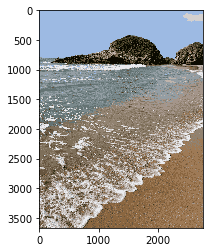

In [24]:
new_img=nueva_imagen()

In [25]:
misc.imsave(f'imageReconWithPalette.jpg', new_img)



/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


# nueva imagen con la paleta integrada abajo

(3024, 4032, 3)
3024


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # Remove the CWD from sys.path while we load stuff.


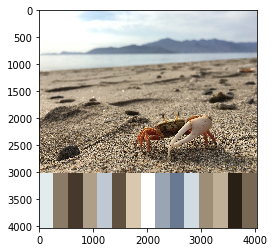

In [8]:
print(new_img.shape)
print(ysize)
new_img=np.zeros((xsize,xsize,3))
slicer=(slice(0, ysize, 1), slice(0,xsize, 1),slice(0, 3, 1))
new_img[slicer]=img/255

for i in range(n):
    slicer=((slice(ysize, xsize, 1), slice(floor(i*xsize/n),floor((i+1)*xsize/n), 1),slice(0, 3, 1)))
    new_img[slicer]=colors[i]
misc.imsave(f'imageWithPalette.jpg', new_img)
plt.imshow(new_img)

# Nueva imagen con paleta vertical

(3670, 2752, 3)
3670


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


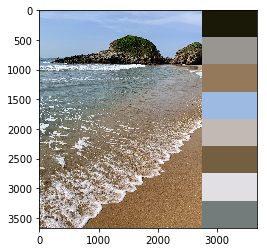

In [15]:
print(new_img.shape)
print(ysize)
new_img=np.zeros((ysize,ysize,3))
slicer=(slice(0, ysize, 1), slice(0,xsize, 1),slice(0, 3, 1))
new_img[slicer]=img/255

for i in range(n):
    slicer=((slice(floor(i*ysize/n),floor((i+1)*ysize/n), 1), slice(xsize, ysize, 1),slice(0, 3, 1)))
    new_img[slicer]=colors[i]
plt.imshow(new_img)
misc.imsave(f'imageWithPalette.jpg', new_img)



## RGB exploration

In [1]:
def f(x,y,z):
    sns.palplot([x/256,y/256,z/256])
    return (x,y,z)
interact(f, x=widgets.IntSlider(min=0, max=255, step=1, value=0,continuous_update=False),y=widgets.IntSlider(min=0, max=255, step=1, value=0,continuous_update=False),z=widgets.IntSlider(min=0, max=255, step=1, value=0,continuous_update=False));


NameError: name 'interact' is not defined

## clusters a partir de (R,G,B,x,y)

## cut in squares a panoramic image.


0
3812
(3812, 3812, 3)
3812
7624
(3812, 3812, 3)
(3812, 3812, 3)


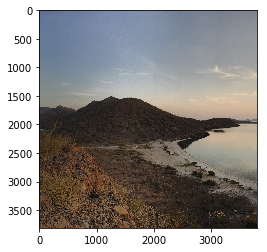

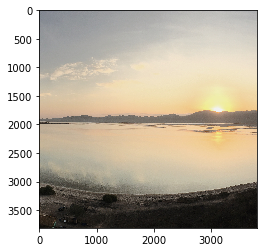

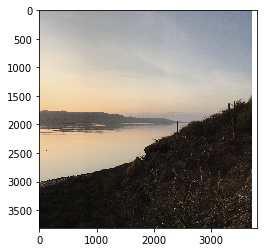

In [66]:
for i in range(floor(xsize/ysize)):
    new_img=np.ndarray(shape=(ysize,ysize,3), dtype=int, order='F')
    print(i*ysize)
    print((i+1)*ysize)
    slicer=(slice(0, ysize, 1), slice(i*ysize,(i+1)*ysize, 1), slice(0, 3, 1))
    new_img=img[slicer]
    plt.figure(i)
    plt.imshow(new_img, cmap=plt.cm.gray)
    print(img[slicer].shape)


new_img=np.ones((ysize,ysize,3),dtype=int)*255
slicer1=(slice(0, ysize, 1), slice((i+1)*ysize,xsize, 1), slice(0, 3, 1))
slicer2=(slice(0, ysize, 1), slice(0,xsize%ysize, 1), slice(0, 3, 1))

print(new_img.shape)
new_img[slicer2]=img[slicer1]
plt.figure(i+1)
plt.imshow(new_img, cmap=plt.cm.gray)


# visualize 2d gaussian filter.

In [13]:
#From https://stackoverflow.com/users/4527807/teddy-hartanto answer
from scipy import signal

def gkern(kernlen=21, std1=3,std2=3):
    """Returns a 2D Gaussian kernel array."""
    gkern1d1= signal.gaussian(kernlen, std=std1).reshape(kernlen, 1)
    gkern1d2= signal.gaussian(kernlen, std=std2).reshape(kernlen, 1)


    #print(gkern1d)
    gkern2d = np.outer(gkern1d1, gkern1d2)
    return gkern2d

In [15]:
def f(res,std1,std2):
    sns.heatmap(gkern(res,std1,std2),cmap='inferno')
    return (res,std1,std2)
interact(f, res=IntSlider(min=1, max=30, step=1, value=10,continuous_update=False),std1=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False),std2=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False));

interactive(children=(IntSlider(value=10, continuous_update=False, description='res', max=30, min=1), IntSlide…